<a href="https://colab.research.google.com/github/omaarjb/an_don/blob/main/G2_04_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt


Read CSV file

In [ ]:
amazon=pd.read_csv("/content/drive/MyDrive/amazon.csv")

Some Testing

In [ ]:
directors=amazon['director']
directors.head()

0      Don McKellar
1      Girish Joshi
2       Josh Webber
3    Sonia Anderson
4      Giles Foster
Name: director, dtype: object

Rows = 9668 / Columns = 12

In [ ]:
amazon.shape

(9668, 12)

In [ ]:
amazon.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


**========================= TOP 5 CATEGORIES BASED ON NUMBER OF TITLES OF EACH CATEGORY =========================**

This part of code groups the data in the DataFrame amazon by the "listed_in" column, which represents the categories of movies or series. It then counts the number of unique titles within each category. The categories are sorted based on the count of titles in descending order to identify the top categories with the highest number of titles. The top 5 categories are selected and stored in the DataFrame top_5_categories_with_titles, which includes two columns: "Category" for the category names and "Number of Titles" for the corresponding counts. Finally, the result is printed to display the top 5 categories along with the number of titles in each category.

In [ ]:
# Group the data by the "category" column and count the number of unique titles in each category
category_counts = amazon.groupby('listed_in')['title'].nunique()

sorted_categories = category_counts.sort_values(ascending=False)

top_5_categories = sorted_categories.head(5)

top_5_categories_with_titles = pd.DataFrame({'Category': top_5_categories.index, 'Number of Titles': top_5_categories.values})


print(top_5_categories_with_titles)


          Category  Number of Titles
0            Drama               986
1           Comedy               536
2  Drama, Suspense               399
3    Comedy, Drama               377
4  Animation, Kids               356


**GRAPH : TOP 5 CATEGORIES BY TITLES**

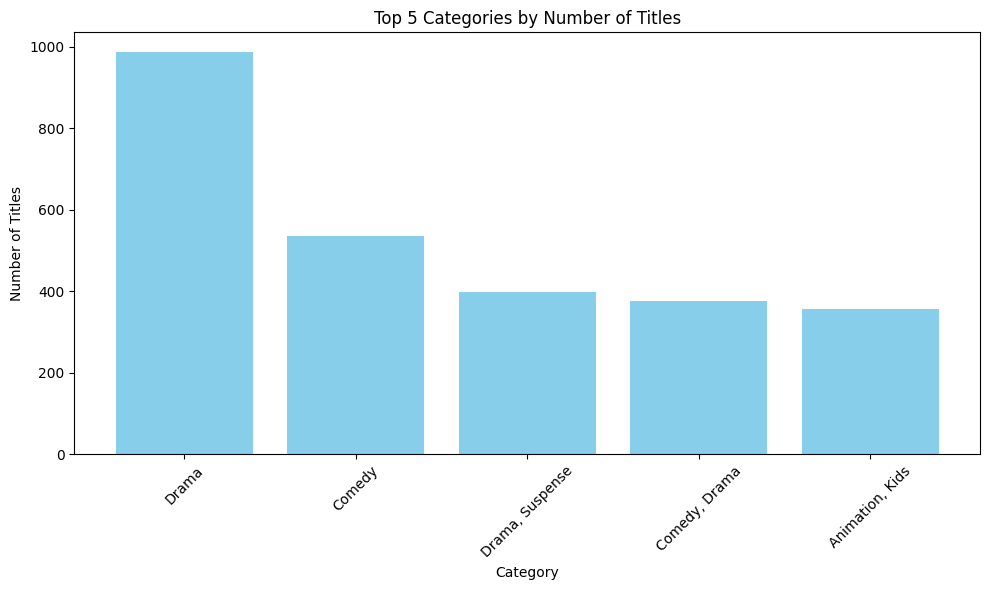

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_categories_with_titles['Category'], top_5_categories_with_titles['Number of Titles'], color='skyblue')
plt.title('Top 5 Categories by Number of Titles')
plt.xlabel('Category')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**==================================== TOP 5 DIRECTORS BY NUMBER OF TITLES ====================================**

 We count the number of unique titles directed by each director, identifies the top 5 directors with the highest number of titles, and displays the result in a DataFrame with columns for director names and the corresponding title counts.

In [ ]:
# Group the data by the "director" column and count the number of unique titles directed by each director
director_counts = amazon.groupby('director')['title'].nunique()

sorted_directors = director_counts.sort_values(ascending=False)


top_5_directors = sorted_directors.head(5)


top_5_directors_with_titles = pd.DataFrame({'Director': top_5_directors.index, 'Number of Titles': top_5_directors.values})


print(top_5_directors_with_titles)

                Director  Number of Titles
0            Mark Knight               113
1          Cannis Holder                61
2  Moonbug Entertainment                37
3            Jay Chapman                34
4     Arthur van Merwijk                30


**GRAPH : TOP 5 DIRECTORS BY TITLES**

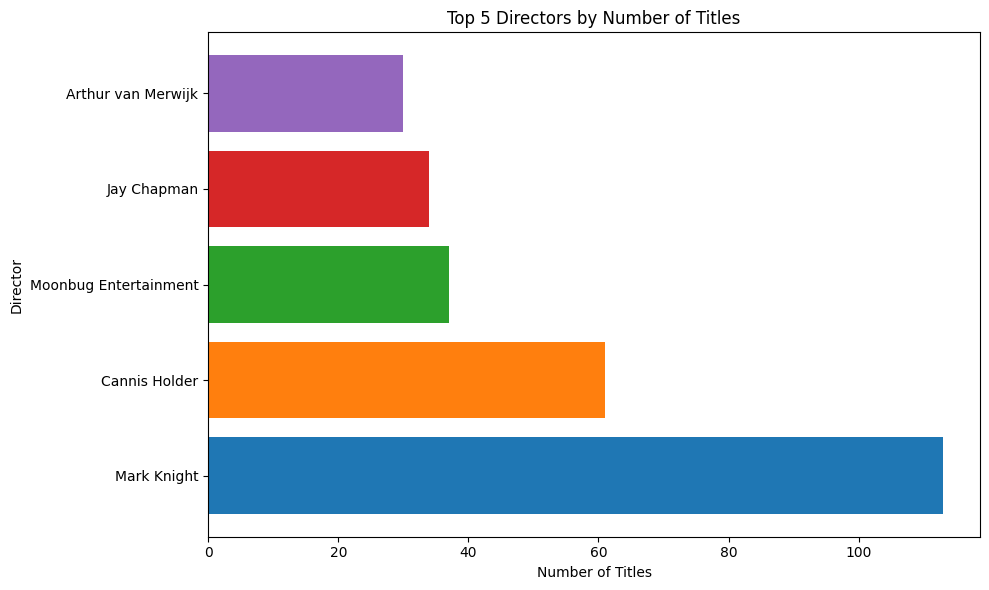

In [ ]:
import matplotlib.pyplot as plt


colors = plt.cm.tab10(np.arange(len(top_5_directors_with_titles)))


plt.figure(figsize=(10, 6))
plt.barh(top_5_directors_with_titles['Director'], top_5_directors_with_titles['Number of Titles'], color=colors)
plt.title('Top 5 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


**==================================== TOP 5 ACTORS BY NUMBER OF TITLES ====================================**


This code snippet cleans the data by removing rows where the 'cast' column has missing values (NaN). It then splits the 'cast' column by ',' to extract individual actors, counts the occurrences of each actor, and removes the entry with the actor name '1' if present. Finally, it selects the top 10 actors with the highest number of appearances and prints the result.

In [ ]:

amazon_cleaned = amazon.dropna(subset=['cast'])
cast_split = amazon_cleaned['cast'].str.split(', ')
all_actors = [actor for sublist in cast_split for actor in sublist]
actor_counts = pd.Series(all_actors).value_counts()
actor_counts = actor_counts[actor_counts.index != '1']

top_10_actors = actor_counts.head(10)


print(top_10_actors)


Maggie Binkley        56
Gene Autry            32
Nassar                30
Champion              29
Anne-Marie Newland    25
Prakash Raj           24
John Wayne            23
Roy Rogers            23
Danny Trejo           22
Cassandra Peterson    22
Name: count, dtype: int64


**GRAPH : TOP 10 ACTORS BY TITLES**

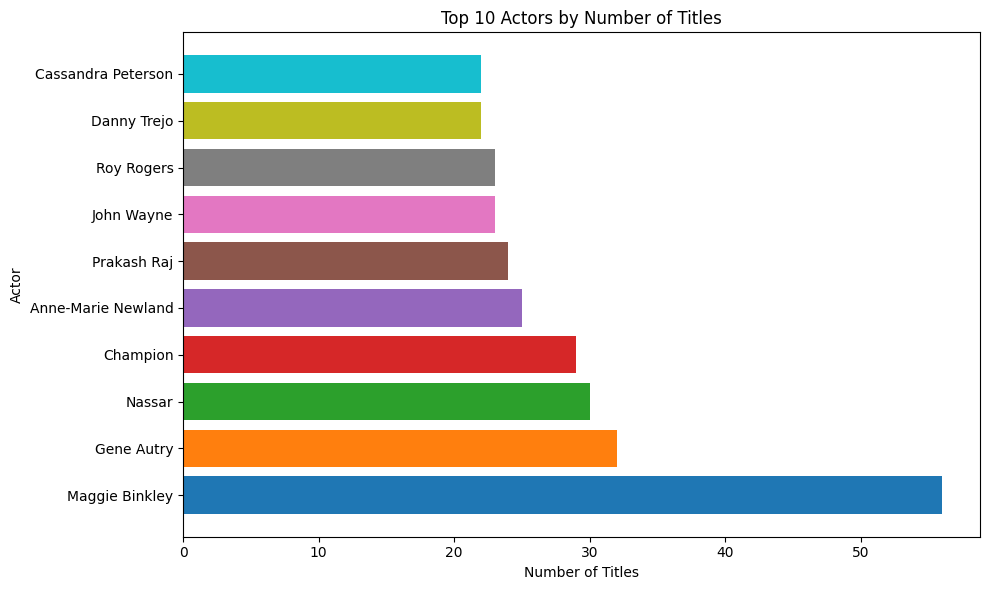

In [ ]:

colors = plt.cm.tab10(np.arange(len(top_10_actors)))

plt.figure(figsize=(10, 6))
plt.barh(top_10_actors.index, top_10_actors.values, color=colors)
plt.title('Top 10 Actors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.tight_layout()
plt.show()


**================================ TOP 5 TV SHOWS WITH HIGHEST NUMBER OF SAISONS ================================**

This code selects TV shows from the 'amazon' dataset, sorts them by the number of seasons in descending order, and then prints out the top 5 TV shows with their corresponding number of seasons.

In [ ]:

top_series = amazon[amazon['type'] == 'TV Show'].sort_values(by='duration', ascending=False)

top_5_series = top_series.head(5)

print(top_5_series[['title', 'duration']])

             title   duration
800      Teen Wolf  9 Seasons
185        Vikings  9 Seasons
1081        Scrubs  9 Seasons
3571  'Allo 'Allo!  9 Seasons
867          Suits  9 Seasons




**================================ SIMILAR CONTENT BASED ON DESCRIPTION ================================**


Data Preparation: Drop rows with missing values in the 'title' and 'description' columns.

Text Vectorization: Initialize a TF-IDF vectorizer to convert text descriptions into numerical TF-IDF vectors.

Compute Similarity Matrix: Calculate the cosine similarity matrix for the TF-IDF vectors, representing the similarity between each pair of titles based on their descriptions.

Identify Similar Titles: Iterate over the indices of the cosine similarity matrix. For each pair of titles with a similarity score:
Extract the titles and similarity score.
Categorize the similarity score as "High" if between 0.8 and 0.9, or "Very High" if above 0.9.
Store the title pair and similarity category in a DataFrame.

Extract the titles and similarity score.
Categorize the similarity score as "High" or "Very High" based on predefined thresholds.
Store the title pair and similarity category in a DataFrame.
Display Results: Display the resulting DataFrame, showing similar titles and their corresponding similarity categories.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Drop rows with NaN values in the 'title' and 'description' columns
amazon_cleaned = amazon.dropna(subset=['title', 'description'])

# Initialize a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Create TF-IDF matrix for descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(amazon_cleaned['description'])

# Compute cosine similarity matrix for descriptions
cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create an empty DataFrame to store the results
similar_titles_table = pd.DataFrame(columns=['Title 1', 'Title 2', 'Similarity'])

# Iterate over indices and add similar titles to the results DataFrame
for i in range(len(amazon_cleaned)):
    for j in range(i+1, len(amazon_cleaned)):
        similarity = cosine_sim_matrix[i, j]
        if similarity > 0.8:
            title1 = amazon_cleaned.iloc[i]['title']
            title2 = amazon_cleaned.iloc[j]['title']
            similarity_category = "Very High" if similarity > 0.9 else "High"
            similar_titles_table = pd.concat([similar_titles_table, pd.DataFrame({'Title 1': [title1], 'Title 2': [title2], 'Similarity': [similarity_category]})], ignore_index=True)

# Display the resulting DataFrame
display(similar_titles_table)


,Title 1,Title 2,Similarity
0,Grease Live!,Social Animals,Very High
1,Yoga for Breath Awareness,Alternate Nostril Breathing,Very High
2,Yatra (Telugu),Yatra (Malayalam),Very High
3,Yatra (Telugu),Yatra (Tamil),Very High
4,Yatra (Malayalam),Yatra (Tamil),Very High
...,...,...,...
883,Thalaivii (Telugu),Thalaivii (Malayalam),Very High
884,Thalaivii (Telugu),Thalaivii (Kannada),Very High
885,Thalaivii (Tamil),Thalaivii (Malayalam),Very High
886,Thalaivii (Tamil),Thalaivii (Kannada),Very High


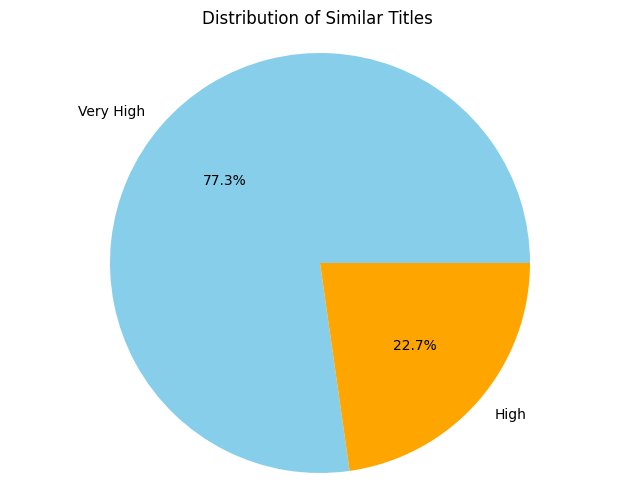

In [ ]:
import matplotlib.pyplot as plt

# Count the number of titles in each similarity category
similarity_counts = similar_titles_table['Similarity'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(similarity_counts, labels=similarity_counts.index, autopct='%1.1f%%', colors=['skyblue', 'orange'])
plt.title('Distribution of Similar Titles ')
plt.axis('equal')
plt.show()




**========================== DISTRUBUTION OF MOVIES AND TV SHOWS (2018-2021) ON AMAZON==========================**

This code snippet converts the 'date_added' column in the 'amazon' DataFrame to datetime format and extracts the year. Then, it filters the DataFrame to include entries from 2018 onwards. Finally, it counts the occurrences of each type of entry ('Movie' or 'TV Show') in the filtered DataFrame.

In [ ]:
amazon['date_added'] = pd.to_datetime(amazon['date_added'])
amazon['year_added'] = amazon['date_added'].dt.year
recent_years_amazon = amazon[amazon['year_added'] >= 2018]
type_counts = recent_years_amazon['type'].value_counts()


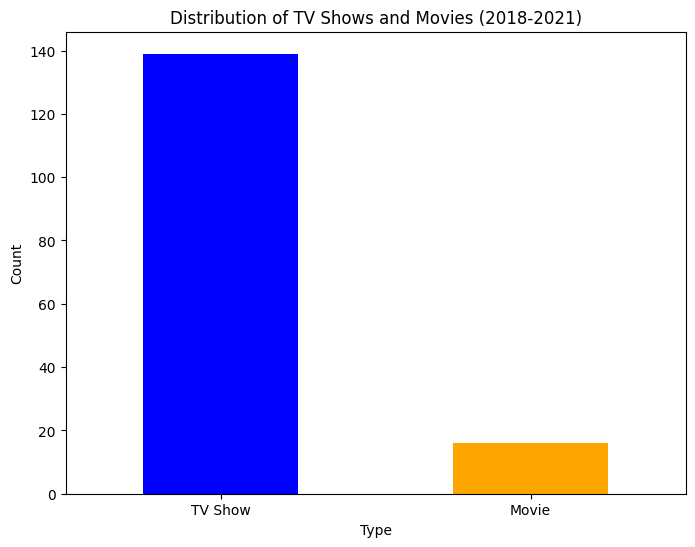

In [ ]:
# Plot the distribution of TV shows and movies
plt.figure(figsize=(8, 6))
type_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of TV Shows and Movies (2018-2021)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



**========================== SHORTEST AND LONGEST MOVIE==========================**


This code snippet converts the duration of movies from hours:minutes format to minutes. It then identifies the longest and shortest movies based on duration, within the 'Movie' type. Finally, it displays information about the longest and shortest movies as DataFrames.

In [ ]:
import re

# Convert duration to minutes if it's in hours:minutes format
def convert_to_minutes(duration):
    # Check if duration is in hours:minutes format
    if ':' in duration:
        hours, minutes = map(int, duration.split(':'))
        return hours * 60 + minutes
    else:
        # Extract numeric values from the string
        numeric_value = re.findall(r'\d+', duration)
        if numeric_value:
            return int(numeric_value[0])  # Convert to integer
        else:
            return None  # Return None if no numeric value found

# Filter out movies
movies_amazon = amazon[amazon['type'] == 'Movie'].copy()  # Ensure to create a copy

# Convert 'duration' to numeric format
movies_amazon['duration'] = movies_amazon['duration'].apply(convert_to_minutes)

# Find the longest movie by duration
longest_movie_index = movies_amazon['duration'].idxmax()
longest_movie = movies_amazon.loc[[longest_movie_index]]

# Find the shortest movie by duration
shortest_movie_index = movies_amazon['duration'].idxmin()
shortest_movie = movies_amazon.loc[[shortest_movie_index]]

# Display longest and shortest movies as DataFrames
longest_movie_df = pd.DataFrame(longest_movie)
shortest_movie_df = pd.DataFrame(shortest_movie)

print("Longest Movie:")
display(longest_movie_df)

print("\nShortest Movie:")
display(shortest_movie_df)


Longest Movie:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
933,s934,Movie,Soothing Surf at Del Norte for Sleep black screen,Mark Knight,NaN,NaN,NaT,2018,ALL,601,Special Interest,Black screen reduces the blue-spectrum light w...,NaN



Shortest Movie:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
788,s789,Movie,Testing title - Parichey is using this title,Tester,Test1,NaN,NaT,2020,ALL,0,Action,Test movie for upload,NaN




**========================== TOP 5 COUNTRIES IN PRODUCTIVITY ==========================**

This code calculates the productivity of each country in terms of the number of productions (movies or TV shows) in the dataset. It groups the dataset by country, counts the number of productions for each country, and then selects the top 5 countries with the highest productivity. Finally, it prints out the top 5 countries along with their respective productivity counts.

In [ ]:

country_productivity = amazon.groupby('country').size().reset_index(name='productivity')

top_5_countries = country_productivity.sort_values(by='productivity', ascending=False).head(5)

print("Top 5 Countries in Productivity:")
print(top_5_countries)


Top 5 Countries in Productivity:
                          country  productivity
60                  United States           253
26                          India           229
51                 United Kingdom            28
8                          Canada            16
58  United Kingdom, United States            12


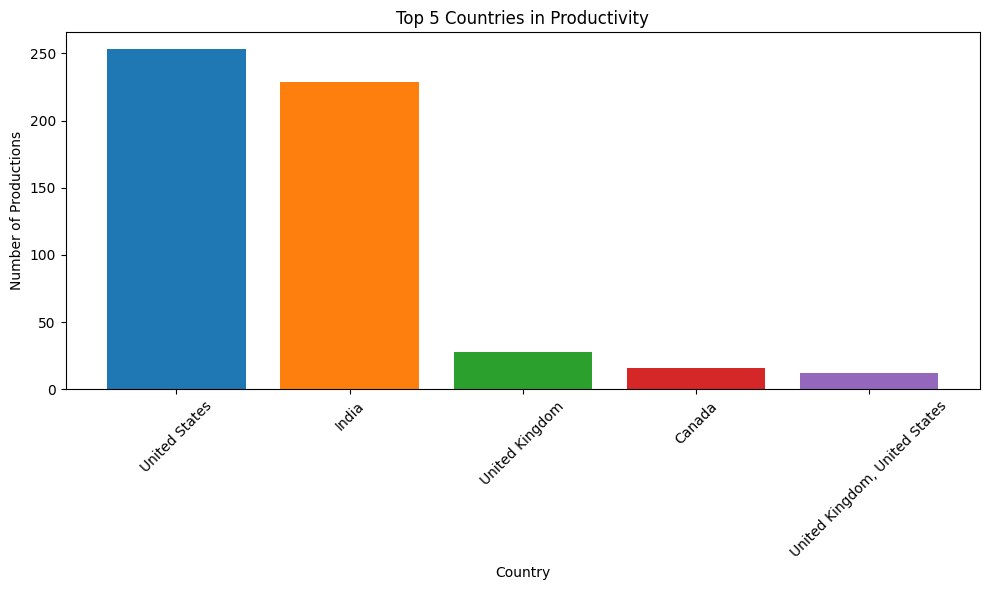

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the bar chart
countries = top_5_countries['country']
productivity = top_5_countries['productivity']

# Create a range for colors
colors = plt.cm.tab10(np.arange(len(countries)))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(countries, productivity, color=colors)
plt.title('Top 5 Countries in Productivity')
plt.xlabel('Country')
plt.ylabel('Number of Productions')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()
